## Домашнее задание

  1. Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston. 


    

In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# # Нормализация
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test[:1]

(354, 13)

(152, 13)

(354,)

(152,)

array([[9.29781490e-04, 0.00000000e+00, 1.07048624e-01, 0.00000000e+00,
        2.57201646e-01, 5.19219036e-01, 8.36251287e-01, 1.37920687e-01,
        1.73913043e-01, 2.08015267e-01, 4.25531915e-01, 9.96469817e-01,
        2.01710817e-01]])

In [23]:
model = Sequential([
    Dense(60, activation='relu', input_shape=(13,)),
    Dense(30, activation='linear'),
    Dense(10, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history = model.fit(X_train, y_train,
                    epochs=40,
                    batch_size=10,
                    validation_data=(X_test, y_test))

Epoch 1/40
36/36 [==============================] - 1s 5ms/step - loss: 584.7820 - mean_squared_error: 584.7820 - val_loss: 433.9137 - val_mean_squared_error: 433.9137
Epoch 2/40
36/36 [==============================] - 0s 2ms/step - loss: 363.4893 - mean_squared_error: 363.4893 - val_loss: 141.7024 - val_mean_squared_error: 141.7024
Epoch 3/40
36/36 [==============================] - 0s 3ms/step - loss: 129.1779 - mean_squared_error: 129.1779 - val_loss: 92.6157 - val_mean_squared_error: 92.6157
Epoch 4/40
36/36 [==============================] - 0s 2ms/step - loss: 91.6069 - mean_squared_error: 91.6069 - val_loss: 66.7320 - val_mean_squared_error: 66.7320
Epoch 5/40
36/36 [==============================] - 0s 2ms/step - loss: 69.7950 - mean_squared_error: 69.7950 - val_loss: 52.9069 - val_mean_squared_error: 52.9069
Epoch 6/40
36/36 [==============================] - 0s 2ms/step - loss: 57.4327 - mean_squared_error: 57.4327 - val_loss: 43.6977 - val_mean_squared_error: 43.6977
Epoch 

In [24]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 60)                840       
                                                                 
 dense_31 (Dense)            (None, 30)                1830      
                                                                 
 dense_32 (Dense)            (None, 10)                310       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,991
Trainable params: 2,991
Non-trainable params: 0
_________________________________________________________________


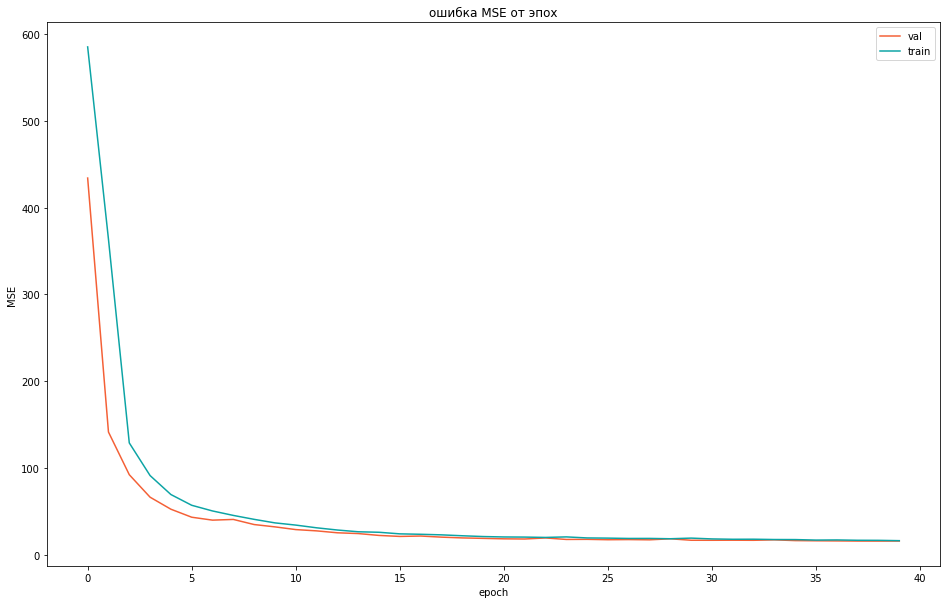

In [25]:
plt.figure(figsize=(16,10))
plt.plot(history.history['val_mean_squared_error'], label='val', c='#F46036')
plt.plot(history.history['mean_squared_error'], label='train', c='#0CA4A5')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('ошибка MSE от эпох')
plt.show()

In [37]:
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.reshape(152,)
display(y_test_pred[:5], y_test[:5]) 

array([26.555471, 35.744656, 17.026697, 24.988176, 17.284029],
      dtype=float32)

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [36]:
print(f"R2 score: {r2_score(y_test, y_test_pred):.4f}")

R2 score: 0.7817


  2. Постройте 10-15 вариантов разных нейронных сетей и сведите результаты их работы в таблицу.  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [ ]:
result = pd.DataFrame(index=history.history)

In [66]:
model_1 = Sequential([
    Dense(60, activation='relu', input_shape=(13,)),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_1.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_1 = model_1.fit(X_train, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_1.history['r2'] = r2_score(y_test, model_1.predict(X_test))

result['model_1'] = history_1.history.values()


Epoch 1/50
36/36 [==============================] - 1s 12ms/step - loss: 581.8990 - mean_squared_error: 581.8990 - val_loss: 444.6579 - val_mean_squared_error: 444.6579
Epoch 2/50
36/36 [==============================] - 0s 5ms/step - loss: 386.7916 - mean_squared_error: 386.7916 - val_loss: 152.5079 - val_mean_squared_error: 152.5079
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 113.8109 - mean_squared_error: 113.8109 - val_loss: 93.3585 - val_mean_squared_error: 93.3585
Epoch 4/50
36/36 [==============================] - 0s 5ms/step - loss: 81.7178 - mean_squared_error: 81.7178 - val_loss: 59.5868 - val_mean_squared_error: 59.5868
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 60.9007 - mean_squared_error: 60.9007 - val_loss: 50.0318 - val_mean_squared_error: 50.0318
Epoch 6/50
36/36 [==============================] - 0s 6ms/step - loss: 50.8750 - mean_squared_error: 50.8750 - val_loss: 41.5134 - val_mean_squared_error: 41.5134
Epoch

In [67]:
# epochs=100
model_2 = Sequential([
    Dense(60, activation='relu', input_shape=(13,)),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_2.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_2 = model_2.fit(X_train, y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_2.history['r2'] = r2_score(y_test, model_2.predict(X_test))

result['model_2'] = history_2.history.values()


Epoch 1/100
36/36 [==============================] - 1s 10ms/step - loss: 570.5745 - mean_squared_error: 570.5745 - val_loss: 411.1817 - val_mean_squared_error: 411.1817
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 337.9850 - mean_squared_error: 337.9849 - val_loss: 133.2693 - val_mean_squared_error: 133.2693
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 132.8764 - mean_squared_error: 132.8764 - val_loss: 97.9161 - val_mean_squared_error: 97.9161
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 97.8732 - mean_squared_error: 97.8732 - val_loss: 72.2899 - val_mean_squared_error: 72.2899
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 75.7916 - mean_squared_error: 75.7916 - val_loss: 54.7639 - val_mean_squared_error: 54.7639
Epoch 6/100
36/36 [==============================] - 0s 6ms/step - loss: 62.5908 - mean_squared_error: 62.5908 - val_loss: 48.0292 - val_mean_squared_error: 48.0292

In [68]:
# epochs=30, add Dense
model_3 = Sequential([
    Dense(60, activation='relu', input_shape=(13,)),
    Dense(45, activation='relu'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_3.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_3 = model_3.fit(X_train, y_train,
                    epochs=30,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_3.history['r2'] = r2_score(y_test, model_3.predict(X_test))

result['model_3'] = history_3.history.values()

Epoch 1/30
36/36 [==============================] - 1s 6ms/step - loss: 556.1292 - mean_squared_error: 556.1292 - val_loss: 347.0699 - val_mean_squared_error: 347.0699
Epoch 2/30
36/36 [==============================] - 0s 3ms/step - loss: 218.2721 - mean_squared_error: 218.2721 - val_loss: 102.5901 - val_mean_squared_error: 102.5901
Epoch 3/30
36/36 [==============================] - 0s 3ms/step - loss: 94.5766 - mean_squared_error: 94.5766 - val_loss: 66.8880 - val_mean_squared_error: 66.8880
Epoch 4/30
36/36 [==============================] - 0s 3ms/step - loss: 67.1623 - mean_squared_error: 67.1623 - val_loss: 48.5171 - val_mean_squared_error: 48.5171
Epoch 5/30
36/36 [==============================] - 0s 3ms/step - loss: 54.1415 - mean_squared_error: 54.1415 - val_loss: 45.5814 - val_mean_squared_error: 45.5814
Epoch 6/30
36/36 [==============================] - 0s 3ms/step - loss: 46.6785 - mean_squared_error: 46.6785 - val_loss: 36.2929 - val_mean_squared_error: 36.2929
Epoch 7/

In [70]:
# epochs=50
model_4 = Sequential([
    Dense(60, activation='relu', input_shape=(13,)),
    Dense(45, activation='relu'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_4.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_4 = model_4.fit(X_train, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_4.history['r2'] = r2_score(y_test, model_4.predict(X_test))

result['model_4'] = history_4.history.values()

Epoch 1/50
36/36 [==============================] - 1s 7ms/step - loss: 572.7409 - mean_squared_error: 572.7409 - val_loss: 404.6075 - val_mean_squared_error: 404.6075
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 276.6605 - mean_squared_error: 276.6605 - val_loss: 121.8056 - val_mean_squared_error: 121.8056
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 107.4279 - mean_squared_error: 107.4279 - val_loss: 80.1182 - val_mean_squared_error: 80.1182
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 78.2832 - mean_squared_error: 78.2832 - val_loss: 56.7291 - val_mean_squared_error: 56.7291
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 59.7426 - mean_squared_error: 59.7426 - val_loss: 47.7391 - val_mean_squared_error: 47.7391
Epoch 6/50
36/36 [==============================] - 0s 4ms/step - loss: 50.9187 - mean_squared_error: 50.9187 - val_loss: 43.4816 - val_mean_squared_error: 43.4816
Epoch 

In [71]:
# epochs=70
model_5 = Sequential([
    Dense(60, activation='relu', input_shape=(13,)),
    Dense(45, activation='relu'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_5.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_5 = model_5.fit(X_train, y_train,
                    epochs=70,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_5.history['r2'] = r2_score(y_test, model_5.predict(X_test))

result['model_5'] = history_5.history.values()

Epoch 1/70
36/36 [==============================] - 1s 9ms/step - loss: 449.3525 - mean_squared_error: 449.3525 - val_loss: 151.0996 - val_mean_squared_error: 151.0996
Epoch 2/70
36/36 [==============================] - 0s 5ms/step - loss: 109.2029 - mean_squared_error: 109.2029 - val_loss: 66.8171 - val_mean_squared_error: 66.8171
Epoch 3/70
36/36 [==============================] - 0s 7ms/step - loss: 63.3686 - mean_squared_error: 63.3686 - val_loss: 45.9717 - val_mean_squared_error: 45.9717
Epoch 4/70
36/36 [==============================] - 0s 5ms/step - loss: 47.0365 - mean_squared_error: 47.0365 - val_loss: 39.6521 - val_mean_squared_error: 39.6521
Epoch 5/70
36/36 [==============================] - 0s 6ms/step - loss: 41.2100 - mean_squared_error: 41.2100 - val_loss: 35.5423 - val_mean_squared_error: 35.5423
Epoch 6/70
36/36 [==============================] - 0s 6ms/step - loss: 35.4501 - mean_squared_error: 35.4501 - val_loss: 30.1969 - val_mean_squared_error: 30.1969
Epoch 7/70

In [74]:
# epochs=100
model_6 = Sequential([
    Dense(60, activation='relu', input_shape=(13,)),
    Dense(45, activation='relu'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_6.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_6 = model_6.fit(X_train, y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_6.history['r2'] = r2_score(y_test, model_6.predict(X_test))

result['model_6'] = history_6.history.values()

Epoch 1/100
36/36 [==============================] - 1s 7ms/step - loss: 563.9943 - mean_squared_error: 563.9943 - val_loss: 361.7004 - val_mean_squared_error: 361.7004
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 200.8881 - mean_squared_error: 200.8881 - val_loss: 96.6828 - val_mean_squared_error: 96.6828
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 84.4088 - mean_squared_error: 84.4088 - val_loss: 63.8907 - val_mean_squared_error: 63.8907
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 56.5064 - mean_squared_error: 56.5064 - val_loss: 42.1596 - val_mean_squared_error: 42.1596
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 44.2107 - mean_squared_error: 44.2107 - val_loss: 43.4165 - val_mean_squared_error: 43.4165
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 38.6280 - mean_squared_error: 38.6280 - val_loss: 36.4924 - val_mean_squared_error: 36.4924
Epoc

In [75]:
# batch_size=15
model_7 = Sequential([
    Dense(60, activation='relu', input_shape=(13,)),
    Dense(45, activation='relu'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_7.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_7 = model_7.fit(X_train, y_train,
                    epochs=100,
                    batch_size=15,
                    validation_data=(X_test, y_test))

history_7.history['r2'] = r2_score(y_test, model_7.predict(X_test))

result['model_7'] = history_7.history.values()

Epoch 1/100
24/24 [==============================] - 1s 15ms/step - loss: 564.0774 - mean_squared_error: 564.0774 - val_loss: 404.4286 - val_mean_squared_error: 404.4286
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 331.8689 - mean_squared_error: 331.8689 - val_loss: 128.0748 - val_mean_squared_error: 128.0748
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 134.2313 - mean_squared_error: 134.2313 - val_loss: 100.0919 - val_mean_squared_error: 100.0919
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 97.9232 - mean_squared_error: 97.9232 - val_loss: 69.2377 - val_mean_squared_error: 69.2377
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 72.1943 - mean_squared_error: 72.1943 - val_loss: 56.6791 - val_mean_squared_error: 56.6791
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 54.8489 - mean_squared_error: 54.8489 - val_loss: 45.7626 - val_mean_squared_error: 45.76

In [76]:
# batch_size=8
model_8 = Sequential([
    Dense(60, activation='relu', input_shape=(13,)),
    Dense(45, activation='relu'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_8.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_8 = model_8.fit(X_train, y_train,
                    epochs=100,
                    batch_size=8,
                    validation_data=(X_test, y_test))

history_8.history['r2'] = r2_score(y_test, model_8.predict(X_test))

result['model_8'] = history_8.history.values()

Epoch 1/100
45/45 [==============================] - 1s 9ms/step - loss: 542.6965 - mean_squared_error: 542.6965 - val_loss: 286.0342 - val_mean_squared_error: 286.0342
Epoch 2/100
45/45 [==============================] - 0s 5ms/step - loss: 172.7796 - mean_squared_error: 172.7796 - val_loss: 96.4610 - val_mean_squared_error: 96.4610
Epoch 3/100
45/45 [==============================] - 0s 5ms/step - loss: 92.0449 - mean_squared_error: 92.0449 - val_loss: 61.3808 - val_mean_squared_error: 61.3808
Epoch 4/100
45/45 [==============================] - 0s 6ms/step - loss: 57.8196 - mean_squared_error: 57.8196 - val_loss: 43.4338 - val_mean_squared_error: 43.4338
Epoch 5/100
45/45 [==============================] - 0s 6ms/step - loss: 46.7733 - mean_squared_error: 46.7733 - val_loss: 38.2160 - val_mean_squared_error: 38.2160
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 39.4183 - mean_squared_error: 39.4183 - val_loss: 32.9710 - val_mean_squared_error: 32.9710
Epoc

In [77]:
# batch_size=10, add Dense
model_9 = Sequential([
    Dense(80, activation='relu', input_shape=(13,)),
    Dense(60, activation='relu'),
    Dense(45, activation='relu'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_9.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_9 = model_9.fit(X_train, y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_9.history['r2'] = r2_score(y_test, model_9.predict(X_test))

result['model_9'] = history_9.history.values()

Epoch 1/100
36/36 [==============================] - 1s 13ms/step - loss: 477.9826 - mean_squared_error: 477.9826 - val_loss: 167.7161 - val_mean_squared_error: 167.7161
Epoch 2/100
36/36 [==============================] - 0s 7ms/step - loss: 146.3832 - mean_squared_error: 146.3832 - val_loss: 88.4438 - val_mean_squared_error: 88.4438
Epoch 3/100
36/36 [==============================] - 0s 9ms/step - loss: 82.7480 - mean_squared_error: 82.7480 - val_loss: 50.2898 - val_mean_squared_error: 50.2898
Epoch 4/100
36/36 [==============================] - 0s 9ms/step - loss: 53.7346 - mean_squared_error: 53.7346 - val_loss: 46.0771 - val_mean_squared_error: 46.0771
Epoch 5/100
36/36 [==============================] - 0s 8ms/step - loss: 44.1117 - mean_squared_error: 44.1117 - val_loss: 40.1656 - val_mean_squared_error: 40.1656
Epoch 6/100
36/36 [==============================] - 0s 8ms/step - loss: 37.1643 - mean_squared_error: 37.1643 - val_loss: 31.0739 - val_mean_squared_error: 31.0739
Epo

In [79]:
# 1st Dense - 70
model_10 = Sequential([
    Dense(70, activation='relu', input_shape=(13,)),
    Dense(60, activation='relu'),
    Dense(45, activation='relu'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_10.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_10 = model_10.fit(X_train, y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_10.history['r2'] = r2_score(y_test, model_10.predict(X_test))

result['model_10'] = history_10.history.values()

Epoch 1/100
36/36 [==============================] - 1s 6ms/step - loss: 598.1443 - mean_squared_error: 598.1443 - val_loss: 435.8908 - val_mean_squared_error: 435.8908
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 246.0733 - mean_squared_error: 246.0733 - val_loss: 98.0303 - val_mean_squared_error: 98.0303
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 90.8226 - mean_squared_error: 90.8226 - val_loss: 60.1838 - val_mean_squared_error: 60.1838
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 60.5478 - mean_squared_error: 60.5478 - val_loss: 47.2923 - val_mean_squared_error: 47.2923
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 50.6685 - mean_squared_error: 50.6685 - val_loss: 41.7416 - val_mean_squared_error: 41.7416
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 44.7415 - mean_squared_error: 44.7415 - val_loss: 38.7196 - val_mean_squared_error: 38.7196
Epoc

In [80]:
result

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10
loss,"[581.8989868164062, 386.7916259765625, 113.810...","[570.5745239257812, 337.9849548339844, 132.876...","[556.129150390625, 218.2720947265625, 94.57659...","[572.7409057617188, 276.6604919433594, 107.427...","[449.3525390625, 109.20289611816406, 63.368621...","[563.9943237304688, 200.88809204101562, 84.408...","[564.077392578125, 331.868896484375, 134.23132...","[542.696533203125, 172.77960205078125, 92.0448...","[477.98260498046875, 146.38320922851562, 82.74...","[598.144287109375, 246.07327270507812, 90.8225..."
mean_squared_error,"[581.8989868164062, 386.7916259765625, 113.810...","[570.5745239257812, 337.98492431640625, 132.87...","[556.129150390625, 218.2720947265625, 94.57659...","[572.7409057617188, 276.6604919433594, 107.427...","[449.3525390625, 109.20289611816406, 63.368621...","[563.9943237304688, 200.88809204101562, 84.408...","[564.077392578125, 331.868896484375, 134.23132...","[542.696533203125, 172.77960205078125, 92.0448...","[477.98260498046875, 146.38320922851562, 82.74...","[598.144287109375, 246.07327270507812, 90.8225..."
val_loss,"[444.65789794921875, 152.5078582763672, 93.358...","[411.18170166015625, 133.26934814453125, 97.91...","[347.0699157714844, 102.59008026123047, 66.887...","[404.6075439453125, 121.80560302734375, 80.118...","[151.09962463378906, 66.81705474853516, 45.971...","[361.700439453125, 96.6827621459961, 63.890701...","[404.4285583496094, 128.0748291015625, 100.091...","[286.0341796875, 96.46097564697266, 61.3808097...","[167.716064453125, 88.44378662109375, 50.28978...","[435.8907775878906, 98.0302734375, 60.18383026..."
val_mean_squared_error,"[444.65789794921875, 152.5078582763672, 93.358...","[411.1817321777344, 133.26934814453125, 97.916...","[347.0699157714844, 102.59008026123047, 66.887...","[404.6075439453125, 121.80560302734375, 80.118...","[151.09962463378906, 66.81705474853516, 45.971...","[361.700439453125, 96.6827621459961, 63.890701...","[404.4285583496094, 128.0748291015625, 100.091...","[286.0341796875, 96.46097564697266, 61.3808097...","[167.716064453125, 88.44378662109375, 50.28978...","[435.8907775878906, 98.0302734375, 60.18383026..."
r2,0.7724,0.846574,0.817601,0.837099,0.855797,0.829217,0.839626,0.816683,0.857909,0.837606


In [82]:
# activation linear
model_11 = Sequential([
    Dense(80, activation='linear', input_shape=(13,)),
    Dense(60, activation='relu'),
    Dense(45, activation='relu'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_11.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_11 = model_11.fit(X_train, y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_11.history['r2'] = r2_score(y_test, model_11.predict(X_test))

result['model_11'] = history_11.history.values()

Epoch 1/100
36/36 [==============================] - 1s 6ms/step - loss: 489.6042 - mean_squared_error: 489.6042 - val_loss: 145.3183 - val_mean_squared_error: 145.3183
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 120.9251 - mean_squared_error: 120.9251 - val_loss: 66.3304 - val_mean_squared_error: 66.3304
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 61.9342 - mean_squared_error: 61.9342 - val_loss: 58.8648 - val_mean_squared_error: 58.8648
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 48.3211 - mean_squared_error: 48.3211 - val_loss: 40.6531 - val_mean_squared_error: 40.6531
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 41.2725 - mean_squared_error: 41.2725 - val_loss: 35.6435 - val_mean_squared_error: 35.6435
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 35.9654 - mean_squared_error: 35.9654 - val_loss: 31.1276 - val_mean_squared_error: 31.1276
Epoc

In [83]:
# activation linear
model_12 = Sequential([
    Dense(80, activation='linear', input_shape=(13,)),
    Dense(60, activation='linear'),
    Dense(45, activation='relu'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_12.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_12 = model_12.fit(X_train, y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_12.history['r2'] = r2_score(y_test, model_12.predict(X_test))

result['model_12'] = history_12.history.values()

Epoch 1/100
36/36 [==============================] - 1s 12ms/step - loss: 308.3403 - mean_squared_error: 308.3403 - val_loss: 104.8320 - val_mean_squared_error: 104.8320
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 72.5261 - mean_squared_error: 72.5261 - val_loss: 46.4210 - val_mean_squared_error: 46.4210
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 51.1515 - mean_squared_error: 51.1515 - val_loss: 39.8939 - val_mean_squared_error: 39.8939
Epoch 4/100
36/36 [==============================] - 0s 7ms/step - loss: 39.6942 - mean_squared_error: 39.6942 - val_loss: 33.0042 - val_mean_squared_error: 33.0042
Epoch 5/100
36/36 [==============================] - 0s 8ms/step - loss: 32.5589 - mean_squared_error: 32.5589 - val_loss: 32.0701 - val_mean_squared_error: 32.0701
Epoch 6/100
36/36 [==============================] - 0s 7ms/step - loss: 28.4497 - mean_squared_error: 28.4497 - val_loss: 22.8734 - val_mean_squared_error: 22.8734
Epoch

In [84]:
# activation linear
model_13 = Sequential([
    Dense(80, activation='linear', input_shape=(13,)),
    Dense(60, activation='linear'),
    Dense(45, activation='linear'),
    Dense(30, activation='linear'),
    Dense(15, activation='relu'),
    Dense(1, activation='relu')
])

model_13.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

history_13 = model_13.fit(X_train, y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test, y_test))

history_13.history['r2'] = r2_score(y_test, model_13.predict(X_test))

result['model_13'] = history_13.history.values()

Epoch 1/100
36/36 [==============================] - 1s 11ms/step - loss: 326.3934 - mean_squared_error: 326.3934 - val_loss: 108.2807 - val_mean_squared_error: 108.2807
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 89.0247 - mean_squared_error: 89.0247 - val_loss: 61.3965 - val_mean_squared_error: 61.3965
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 56.8776 - mean_squared_error: 56.8776 - val_loss: 57.2285 - val_mean_squared_error: 57.2285
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 47.3937 - mean_squared_error: 47.3937 - val_loss: 46.3437 - val_mean_squared_error: 46.3437
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 42.0055 - mean_squared_error: 42.0055 - val_loss: 34.8960 - val_mean_squared_error: 34.8960
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 35.1283 - mean_squared_error: 35.1283 - val_loss: 29.8872 - val_mean_squared_error: 29.8872
Epoch

In [85]:
result

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13
loss,"[581.8989868164062, 386.7916259765625, 113.810...","[570.5745239257812, 337.9849548339844, 132.876...","[556.129150390625, 218.2720947265625, 94.57659...","[572.7409057617188, 276.6604919433594, 107.427...","[449.3525390625, 109.20289611816406, 63.368621...","[563.9943237304688, 200.88809204101562, 84.408...","[564.077392578125, 331.868896484375, 134.23132...","[542.696533203125, 172.77960205078125, 92.0448...","[477.98260498046875, 146.38320922851562, 82.74...","[598.144287109375, 246.07327270507812, 90.8225...","[489.604248046875, 120.92513275146484, 61.9342...","[308.34027099609375, 72.52605438232422, 51.151...","[326.3934326171875, 89.02471923828125, 56.8776..."
mean_squared_error,"[581.8989868164062, 386.7916259765625, 113.810...","[570.5745239257812, 337.98492431640625, 132.87...","[556.129150390625, 218.2720947265625, 94.57659...","[572.7409057617188, 276.6604919433594, 107.427...","[449.3525390625, 109.20289611816406, 63.368621...","[563.9943237304688, 200.88809204101562, 84.408...","[564.077392578125, 331.868896484375, 134.23132...","[542.696533203125, 172.77960205078125, 92.0448...","[477.98260498046875, 146.38320922851562, 82.74...","[598.144287109375, 246.07327270507812, 90.8225...","[489.604248046875, 120.92511749267578, 61.9342...","[308.34027099609375, 72.52605438232422, 51.151...","[326.3934326171875, 89.02471923828125, 56.8776..."
val_loss,"[444.65789794921875, 152.5078582763672, 93.358...","[411.18170166015625, 133.26934814453125, 97.91...","[347.0699157714844, 102.59008026123047, 66.887...","[404.6075439453125, 121.80560302734375, 80.118...","[151.09962463378906, 66.81705474853516, 45.971...","[361.700439453125, 96.6827621459961, 63.890701...","[404.4285583496094, 128.0748291015625, 100.091...","[286.0341796875, 96.46097564697266, 61.3808097...","[167.716064453125, 88.44378662109375, 50.28978...","[435.8907775878906, 98.0302734375, 60.18383026...","[145.31826782226562, 66.33041381835938, 58.864...","[104.83201599121094, 46.42102813720703, 39.893...","[108.28072357177734, 61.39650344848633, 57.228..."
val_mean_squared_error,"[444.65789794921875, 152.5078582763672, 93.358...","[411.1817321777344, 133.26934814453125, 97.916...","[347.0699157714844, 102.59008026123047, 66.887...","[404.6075439453125, 121.80560302734375, 80.118...","[151.09962463378906, 66.81705474853516, 45.971...","[361.700439453125, 96.6827621459961, 63.890701...","[404.4285583496094, 128.0748291015625, 100.091...","[286.0341796875, 96.46097564697266, 61.3808097...","[167.716064453125, 88.44378662109375, 50.28978...","[435.8907775878906, 98.0302734375, 60.18383026...","[145.31826782226562, 66.33041381835938, 58.864...","[104.83201599121094, 46.42102813720703, 39.893...","[108.28072357177734, 61.39650344848633, 57.228..."
r2,0.7724,0.846574,0.817601,0.837099,0.855797,0.829217,0.839626,0.816683,0.857909,0.837606,0.795073,0.835667,0.794186


По таблице видно, что по метрике R2 лучшая модель - model_9. Увеличение числа эпох и добавление слоев привело к улучшению метрики.

In [96]:
model_9.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 80)                1120      
                                                                 
 dense_112 (Dense)           (None, 60)                4860      
                                                                 
 dense_113 (Dense)           (None, 45)                2745      
                                                                 
 dense_114 (Dense)           (None, 30)                1380      
                                                                 
 dense_115 (Dense)           (None, 15)                465       
                                                                 
 dense_116 (Dense)           (None, 1)                 16        
                                                                 
Total params: 10,586
Trainable params: 10,586
Non-tra

In [93]:
# plt.figure(figsize=(16,10))
# for model in result.columns:
#   plt.plot(result[model][1], label=f'{model} val_mse')

# plt.legend()
# plt.xlabel('epoch')
# plt.ylabel('MSE')
# plt.title('ошибка MSE от эпох')
# plt.show()